In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
def gaussian_kernel(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-(x ** 2) / 2)

def epanechnikov_kernel(x):
    return (1 - x ** 2) * 3 / 4 * (np.abs(x) <= 1)

def uniform_kernel(x):
    return 1 / 2 * (np.abs(x) <= 1) 

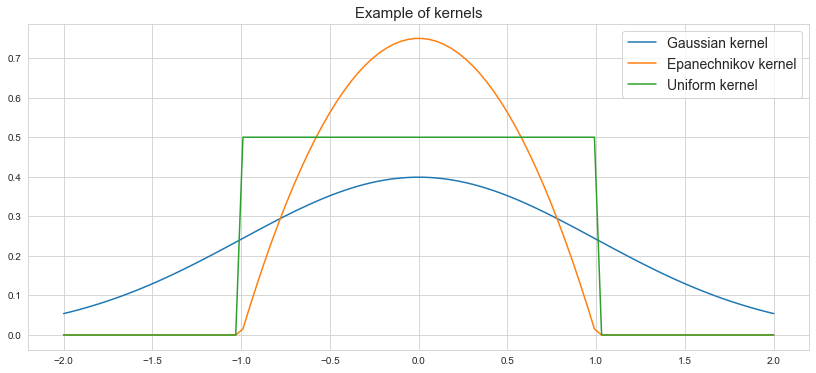

In [9]:
x = np.linspace(-2, 2, 100)

fig, ax = plt.subplots(figsize=(14, 6))
sns.lineplot(x=x, y=gaussian_kernel(x), label="Gaussian kernel")
sns.lineplot(x=x, y=epanechnikov_kernel(x), label="Epanechnikov kernel")
sns.lineplot(x=x, y=uniform_kernel(x), label="Uniform kernel")
ax.legend(fontsize=14)
ax.set_title("Example of kernels", fontsize=15);

# plt.savefig("kernels.pdf", bbox_inches="tight")